## Simple Portfolio Optimization using Python


In [1]:
#Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Downloading Historical Data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start='2019-01-01', end='2024-01-01')
returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  4 of 4 completed


In [3]:
#Expected Returns and Covariance Matrix
expected_returns = returns.mean()
covariance_matrix = returns.cov()
num_assets = len(tickers)

In [4]:
#Portfolio Performance Function
def portfolio_performance(weights, returns, covariance_matrix):
    portfolio_return = np.sum(returns * weights) * 252  # Annualize returns
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix * 252, weights)))  # Annualize risk
    return portfolio_return, portfolio_risk

In [8]:
#Generating Random Portfolios
num_portfolios = 10000
results = np.zeros((num_portfolios, 3))
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize weights
    portfolio_return, portfolio_risk = portfolio_performance(weights, expected_returns, covariance_matrix)
    results[i, 0] = portfolio_return
    results[i, 1] = portfolio_risk
    results[i, 2] = results[i, 0] / results[i, 1]  # Sharpe ratio (assuming risk-free rate = 0)

### Efficient Frontier 

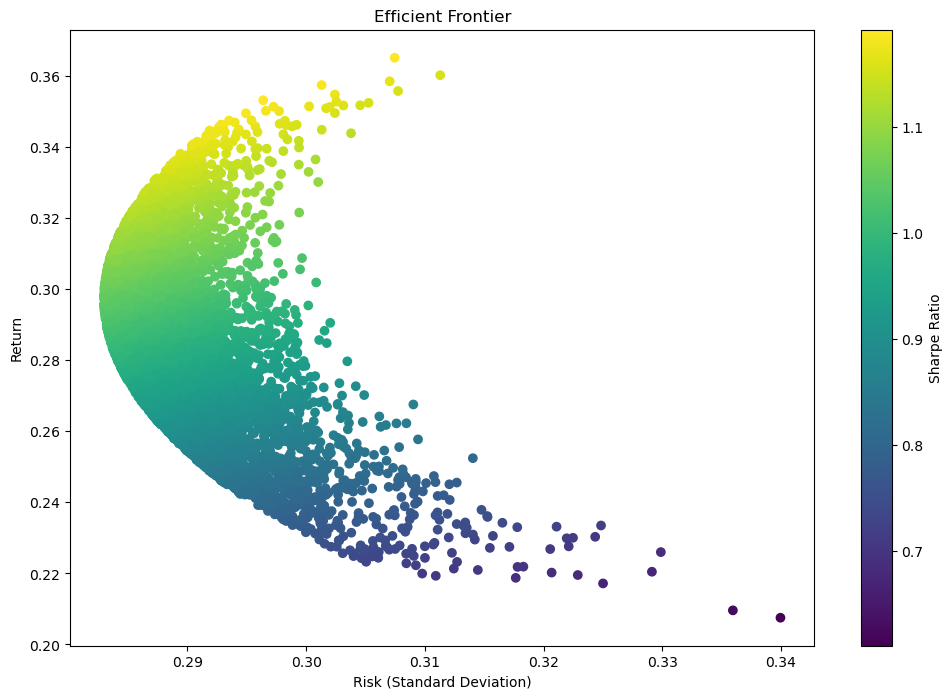

In [9]:
#Plot Efficient Frontier
plt.figure(figsize=(12, 8))
plt.scatter(results[:, 1], results[:, 0], c=results[:, 2], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

### Maximum Sharpe Ratio Portfolio (Tangency) 

Max Sharpe Portfolio Return: 0.3531808323362763
Max Sharpe Portfolio Risk: 0.29637465938818386
Max Sharpe Portfolio Sharpe Ratio: 1.1916701416556978


Text(0.29637465938818386, 0.3531808323362763, 'Max Sharpe\nRatio: 1.19')

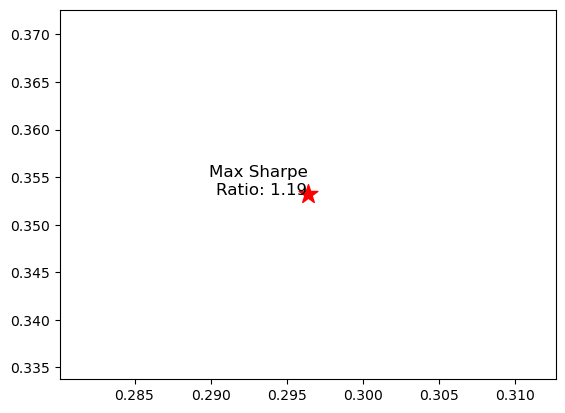

In [10]:
#portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[:, 2])
max_sharpe_return = results[max_sharpe_idx, 0]
max_sharpe_risk = results[max_sharpe_idx, 1]
max_sharpe_ratio = results[max_sharpe_idx, 2]

# Print the portfolio performance
print(f"Max Sharpe Portfolio Return: {max_sharpe_return}")
print(f"Max Sharpe Portfolio Risk: {max_sharpe_risk}")
print(f"Max Sharpe Portfolio Sharpe Ratio: {max_sharpe_ratio}")

plt.scatter(max_sharpe_risk, max_sharpe_return, color='red', marker='*', s=200)  # Marking the maximum Sharpe ratio portfolio
plt.text(max_sharpe_risk, max_sharpe_return, f"Max Sharpe\nRatio: {max_sharpe_ratio:.2f}", fontsize=12, ha='right')

In [11]:
# Extract the weights for the maximum Sharpe ratio portfolio
max_sharpe_weights = np.random.random(num_assets)
max_sharpe_weights = max_sharpe_weights / np.sum(max_sharpe_weights)

In [12]:
# Define the total amount to invest
total_investment = 100000  # $100,000

# Calculate the dollar amount to invest in each stock
investment_per_stock = max_sharpe_weights * total_investment

# Print the results
for i, ticker in enumerate(tickers):
    print(f"Invest ${investment_per_stock[i]:.2f} in {ticker}")

Invest $39349.62 in AAPL
Invest $11140.14 in MSFT
Invest $27607.57 in GOOGL
Invest $21902.67 in AMZN


In [13]:
print("Maximum Sharpe Ratio Portfolio")
print(f"Sharpe Ratio: {max_sharpe_ratio:.2f}")
print(f"Expected Annual Return: {max_sharpe_return:.2f}")
print(f"Annualized Risk (Standard Deviation): {max_sharpe_risk:.2f}")
print(f"Optimal Weights: {max_sharpe_weights}")

print("\nInvestment Allocation:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {max_sharpe_weights[i]:.2%} ({investment_per_stock[i]:.2f})")

Maximum Sharpe Ratio Portfolio
Sharpe Ratio: 1.19
Expected Annual Return: 0.35
Annualized Risk (Standard Deviation): 0.30
Optimal Weights: [0.39349623 0.11140139 0.27607571 0.21902668]

Investment Allocation:
AAPL: 39.35% (39349.62)
MSFT: 11.14% (11140.14)
GOOGL: 27.61% (27607.57)
AMZN: 21.90% (21902.67)
